# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [12]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [13]:
path_data = ''

## texts
fname_data = './corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = './titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [14]:
i_doc = 0
print(titles[0])
print(texts[i_doc][:10])


0
['41', '41', '41', '41', '41', '41', '481', '481']


# Fitting the model

In [15]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

<NestedBlockState object, with base <BlockState object with 2560 blocks (296 nonempty), degree-corrected, for graph <Graph object, undirected, with 2560 vertices and 7260 edges, 2 internal vertex properties, 1 internal edge property, at 0x169fcacd0>, at 0x16a06d3d0>, and 7 levels of sizes [(2560, 296), (296, 106), (106, 43), (43, 14), (14, 4), (4, 2), (2, 1)] at 0x164e52a90>


# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

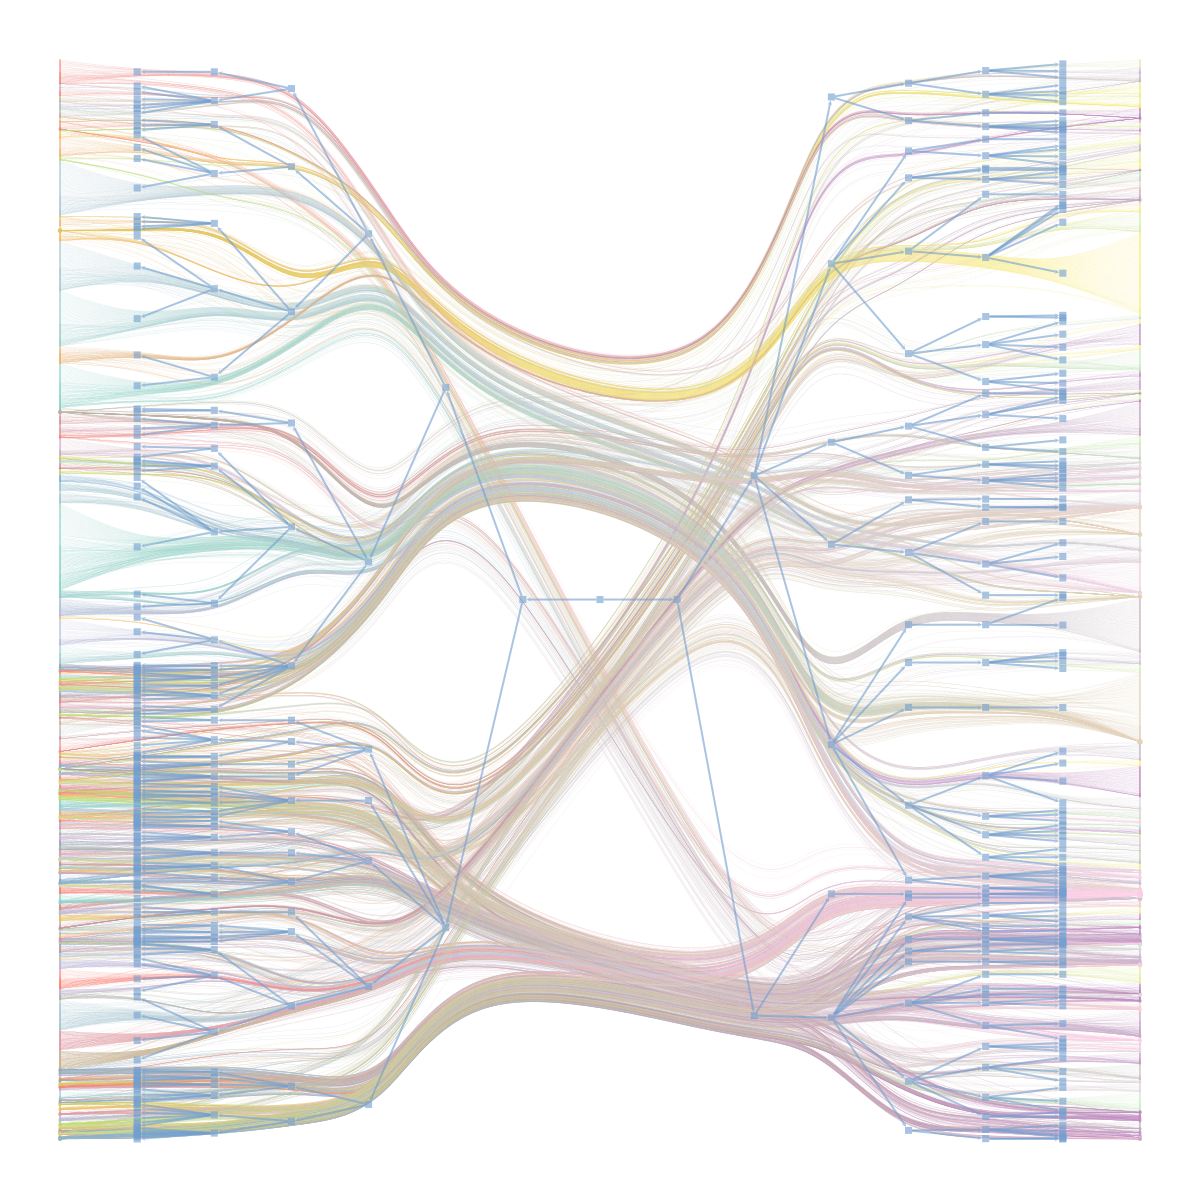

In [16]:
model.plot(nedges=10000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [11]:
model.topics(l=1,n=20)

{0: [('41', 0.9730994152046784),
  ('561', 0.011695906432748537),
  ('644', 0.007017543859649123),
  ('560', 0.004678362573099415),
  ('562', 0.0035087719298245615)],
 1: [('481', 0.8384615384615385),
  ('530', 0.035897435897435895),
  ('115', 0.023076923076923078),
  ('427', 0.01282051282051282),
  ('51', 0.007692307692307693),
  ('266', 0.005128205128205128),
  ('596', 0.005128205128205128),
  ('1107', 0.005128205128205128),
  ('623', 0.002564102564102564),
  ('863', 0.002564102564102564),
  ('688', 0.002564102564102564),
  ('589', 0.002564102564102564),
  ('734', 0.002564102564102564),
  ('169', 0.002564102564102564),
  ('23', 0.002564102564102564),
  ('129', 0.002564102564102564),
  ('701', 0.002564102564102564),
  ('126', 0.002564102564102564),
  ('96', 0.002564102564102564),
  ('832', 0.002564102564102564)],
 2: [('1333', 0.79204107830552),
  ('501', 0.014120667522464698),
  ('243', 0.012836970474967908),
  ('313', 0.012836970474967908),
  ('1328', 0.010269576379974325),
  ('898'

## Topic-distribution in each document
Which topics contribute to each document?

In [15]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

0


[(0, 0.75),
 (1, 0.25),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [16]:
model.clusters(l=1,n=5)

{0: [('0', 1.0), ('670', 1.0), ('875', 1.0), ('1114', 1.0), ('4', 1.0)],
 1: [('18', 1.0), ('1120', 1.0), ('1127', 1.0), ('843', 1.0), ('55', 1.0)],
 2: [('751', 1.0), ('975', 1.0), ('1124', 1.0), ('963', 1.0), ('747', 1.0)],
 3: [('352', 1.0), ('135', 1.0), ('625', 1.0), ('768', 1.0), ('832', 1.0)],
 4: [('914', 1.0), ('858', 1.0), ('1000', 1.0), ('33', 1.0), ('886', 1.0)],
 5: [('779', 1.0), ('91', 1.0), ('139', 1.0), ('874', 1.0), ('972', 1.0)],
 6: [('263', 1.0), ('314', 1.0), ('382', 1.0), ('809', 1.0), ('1182', 1.0)],
 7: [('1039', 1.0), ('828', 1.0), ('1155', 1.0), ('177', 1.0), ('674', 1.0)],
 8: [('826', 1.0), ('1101', 1.0), ('464', 1.0), ('9', 1.0), ('1004', 1.0)],
 9: [('697', 1.0), ('353', 1.0), ('152', 1.0), ('1092', 1.0), ('1093', 1.0)],
 10: [('724', 1.0), ('367', 1.0), ('910', 1.0), ('375', 1.0), ('262', 1.0)],
 11: [('808', 1.0), ('203', 1.0), ('81', 1.0), ('894', 1.0), ('1183', 1.0)],
 12: [('89', 1.0), ('1008', 1.0), ('11', 1.0), ('686', 1.0), ('426', 1.0)],
 13: [('

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [17]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 10


[(21, '1016'),
 (45, '1038'),
 (98, '1086'),
 (141, '1124'),
 (162, '1143'),
 (241, '144'),
 (247, '15'),
 (261, '162'),
 (262, '163'),
 (311, '207'),
 (335, '229'),
 (338, '231'),
 (343, '236'),
 (462, '343'),
 (496, '374'),
 (502, '38'),
 (526, '400'),
 (566, '437'),
 (573, '443'),
 (728, '583'),
 (832, '677'),
 (860, '701'),
 (874, '714'),
 (892, '730'),
 (910, '747'),
 (915, '751'),
 (940, '774'),
 (970, '800'),
 (987, '816'),
 (1065, '887'),
 (1140, '954'),
 (1150, '963'),
 (1162, '974'),
 (1163, '975'),
 (1183, '993'),
 (1187, '997')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

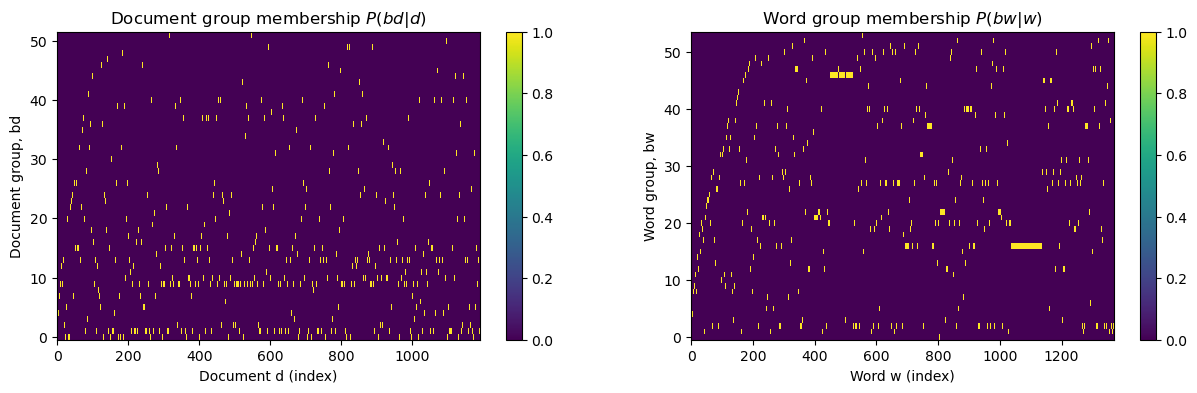

In [18]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()